
---

### 1.**Network Traffic**?  
> **Network traffic** is just the **flow of data** moving across a network — like the internet or a company’s internal network.

- When you **send a message**, **watch a video**, or **download a file**, your device sends and receives **data**.
- That moving data is called **network traffic**.
  
**Example:**  
When you open Google, your browser sends a request → Google sends back a webpage → This is network traffic.

---

### 2.   **Anomaly**?  
> **Anomaly** means **something unusual**, **something that doesn’t normally happen**.

- In life: If a usually quiet street suddenly has thousands of cars, that’s an **anomaly**.
- In network traffic: If usually there are 100 users and suddenly 10,000 users connect — that’s **an anomaly**.

**Example:**  
Normally your website gets 500 visitors/day.  
Suddenly, you get 50,000 visitors in 1 minute → **Something is wrong** → Anomaly.

---

### 3.  **Anomaly Detection in Network Traffic**?  
> It means **finding strange or suspicious activities** in the network traffic.

- You **watch the normal traffic**: emails, web browsing, logins, downloads.
- If you **notice weird behavior**: too many downloads, unknown IPs, sudden huge traffic — you **detect it** as an anomaly.

**Simple way to think:**  
You are **watching the traffic** —  
If something **very different or suspicious happens**, you **catch it**.

---

### 4.  **Importance of Detecting Anomalies** in Network Traffic?

**Why should you care? Because:**
- 🛡️ **Cybersecurity**: Anomalies often mean hacking attempts (malware, DDoS attacks, data theft).
- 🔎 **Early Warning**: Detect problems early before big damage happens.
- 📈 **Performance**: Helps keep the network smooth and healthy.
- 🔥 **Save Money and Reputation**: Quickly detecting breaches saves companies millions and protects customer trust.
- 🛠️ **Troubleshooting**: Find and fix bugs or problems in the system faster.

---

### 🎯 Quick Summary:
| Concept | Meaning |
|:---|:---|
| Network Traffic | Normal data movement in a network |
| Anomaly | Anything unexpected or unusual |
| Anomaly Detection | Finding strange/suspicious activities in the traffic |
| Importance | Protect from attacks, keep network healthy, prevent damage |

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# !unzip "/content/Anomaly Detection in Network Traffic" -d "/content/drive/MyDrive/task/Anomaly detection in network traffic"


In [3]:
dfTrain = pd.read_csv("/content/drive/MyDrive/task/Anomaly detection in network traffic/Train.txt")

dfTest = pd.read_csv("/content/drive/MyDrive/task/Anomaly detection in network traffic/Test.txt")


In [4]:
dfTrain.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
len(columns)

43

In [6]:
dfTrain.columns = columns
dfTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
dfTrain.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [8]:
dfTrain.duplicated().sum()

np.int64(0)

In [9]:
dfTrain.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
dfTrain['attack'].value_counts()

,count
attack,
normal,67342
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [11]:

DoS= [
    "Back", "Land", "Neptune", "Pod",
    "Smurf", "Teardrop", "Apache2", "Udpstorm",
    "Processtable", "Worm"
]
Probe = [
    "Satan", "Ipsweep", "Nmap", "Portsweep",
    "Mscan", "Saint"
]
R2L=[
    "Guess_Password", "Ftp_write", "Imap", "Phf",
    "Multihop", "Warezmaster", "Warezclient", "Spy",
    "Xlock", "Xsnoop", "Snmpguess", "Snmpgetattack",
    "Httptunnel", "Sendmail", "Named"
]
U2R= [
    "Buffer_overflow", "Loadmodule", "Rootkit", "Perl",
    "Sqlattack", "Xterm", "Ps"
]

In [12]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

## EDA

In [24]:
# Convert binary columns (if needed)
binary_cols = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
dfTrain[binary_cols] = dfTrain[binary_cols].astype('category')
print(dfTrain.nunique().sort_values())

num_outbound_cmds                 1
land                              2
root_shell                        2
logged_in                         2
is_host_login                     2
is_guest_login                    2
wrong_fragment                    3
protocol_type                     3
num_shells                        3
su_attempted                      3
urgent                            4
attack_new                        5
num_failed_logins                 6
num_access_files                 10
flag                             11
last_flag                        22
attack                           23
hot                              28
num_file_creations               35
srv_diff_host_rate               60
srv_rerror_rate                  62
service                          70
dst_host_srv_diff_host_rate      75
rerror_rate                      82
num_root                         82
srv_serror_rate                  86
num_compromised                  88
serror_rate                 

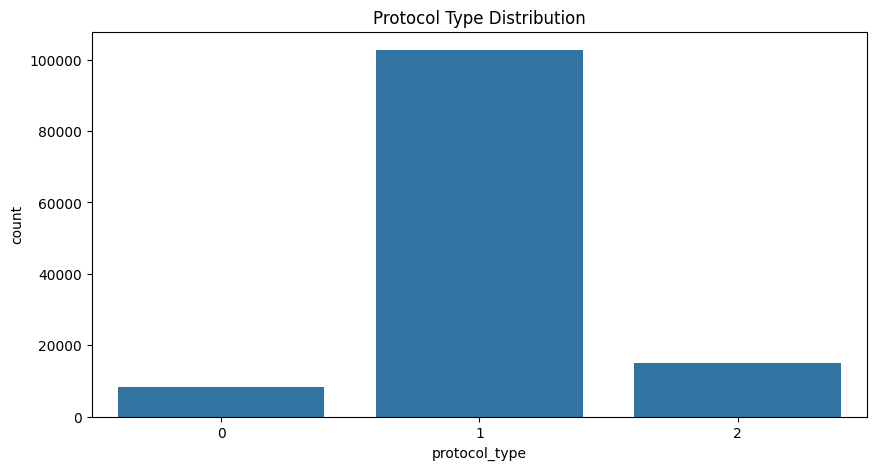

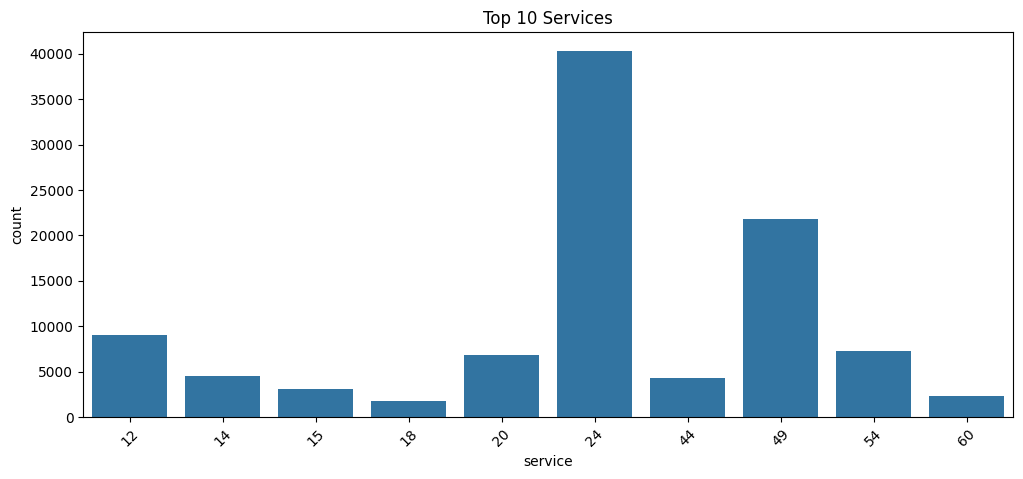

In [28]:
# Protocol and service distributions
plt.figure(figsize=(10,5))
sns.countplot(x='protocol_type', data=dfTrain)
plt.title('Protocol Type Distribution')
plt.show()


plt.figure(figsize=(12,5))
top_services = dfTrain['service'].value_counts().nlargest(10).index
sns.countplot(x='service', data=dfTrain[dfTrain['service'].isin(top_services)])
plt.xticks(rotation=45)
plt.title('Top 10 Services')
plt.show()


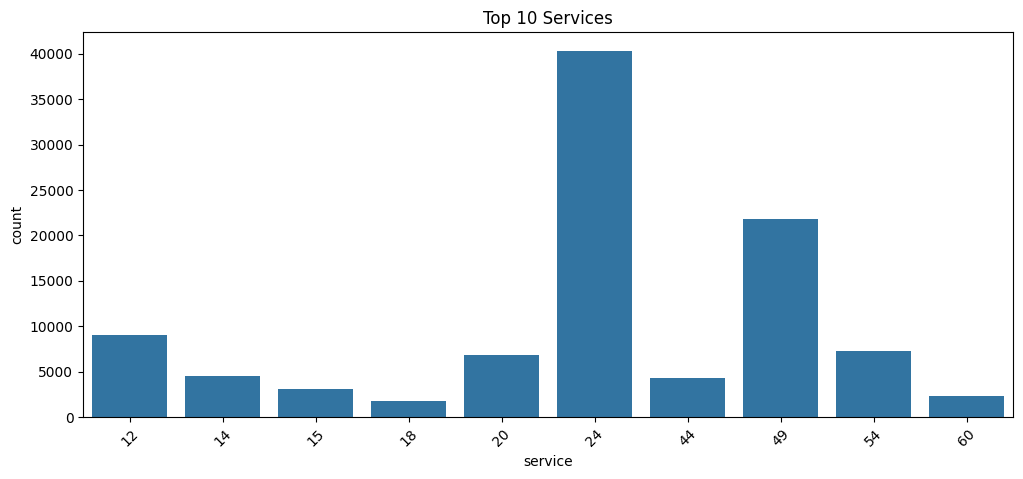

In [27]:

# Correlation heatmap of numeric features
numeric_cols = dfTrain.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(16,10))
corr = dfTrain[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


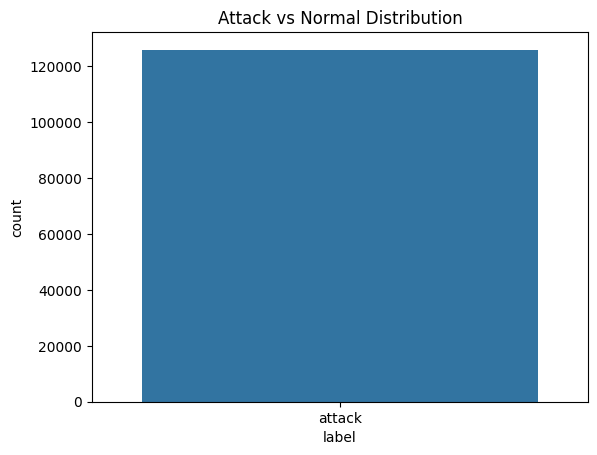

In [29]:
# Attack vs Normal comparison
dfTrain['label'] = dfTrain['attack'].apply(lambda x: 'normal' if x == 'normal.' else 'attack')
sns.countplot(x='label', data=dfTrain)
plt.title('Attack vs Normal Distribution')
plt.show()


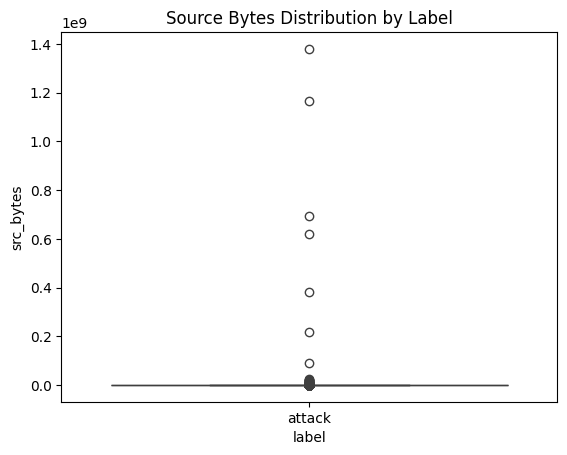

In [30]:
# Boxplot of some numeric feature
sns.boxplot(x='label', y='src_bytes', data=dfTrain)
plt.title('Source Bytes Distribution by Label')
plt.show()

## Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

col= ["protocol_type", "service", "flag"]

encoder =LabelEncoder()
for x in col:
  dfTrain[x] =encoder.fit_transform(dfTrain[x])


In [14]:
DoS = [
    "back", "land", "neptune", "pod",
    "smurf", "teardrop", "apache2", "udpstorm",
    "processtable", "worm"
]

Probe = [
    "satan", "ipsweep", "nmap", "portsweep",
    "mscan", "saint"
]

R2L = [
    "guess_passwd", "ftp_write", "imap", "phf",
    "multihop", "warezmaster", "warezclient", "spy",
    "xlock", "xsnoop", "snmpguess", "snmpgetattack",
    "httptunnel", "sendmail", "named"
]

U2R = [
    "buffer_overflow", "loadmodule", "rootkit", "perl",
    "sqlattack", "xterm", "ps"
]


In [15]:
def changing_attack(val):
  if val in DoS:
    return "DoS"
  elif val in Probe:
    return "Probe"
  elif val in R2L:
    return "R2L"
  elif val in U2R:
    return "U2R"
  else:
    return val

dfTrain["attack_new"] = dfTrain["attack"].apply(changing_attack)

In [16]:
dfTrain["attack_new"].value_counts()

,count
attack_new,
normal,67342
DoS,45927
Probe,11656
R2L,995
U2R,52


In [17]:
X = dfTrain.drop(["attack_new","attack"], axis=1)
dfTrain["attack_new"] =encoder.fit_transform(dfTrain["attack_new"])
y =dfTrain['attack_new']

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
import pandas as pd

feature_importances = pd.Series(importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Top features
print("Top Important Features:")
print(feature_importances.head(20))


Top Important Features:
src_bytes                      0.111402
same_srv_rate                  0.109469
diff_srv_rate                  0.077600
flag                           0.067142
count                          0.051267
dst_host_srv_serror_rate       0.050107
last_flag                      0.049669
dst_bytes                      0.044537
serror_rate                    0.044503
dst_host_same_srv_rate         0.042660
dst_host_diff_srv_rate         0.041446
protocol_type                  0.032882
dst_host_same_src_port_rate    0.032604
logged_in                      0.031368
dst_host_serror_rate           0.027978
dst_host_srv_count             0.025133
srv_count                      0.023351
dst_host_srv_diff_host_rate    0.022570
srv_serror_rate                0.019972
service                        0.018520
dtype: float64


In [19]:
from sklearn.model_selection import train_test_split


X = dfTrain.drop(["attack_new","attack"], axis=1)

y = dfTrain["attack_new"]


🔵 Model: Random Forest
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00      3497
           2       1.00      0.98      0.99       298
           3       1.00      0.88      0.93        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       1.00      0.97      0.98     37792
weighted avg       1.00      1.00      1.00     37792

Confusion Matrix:
[[13777     1     0     0     0]
 [    0  3494     0     0     3]
 [    0     0   292     0     6]
 [    0     0     0    14     2]
 [    2     3     1     0 20197]]


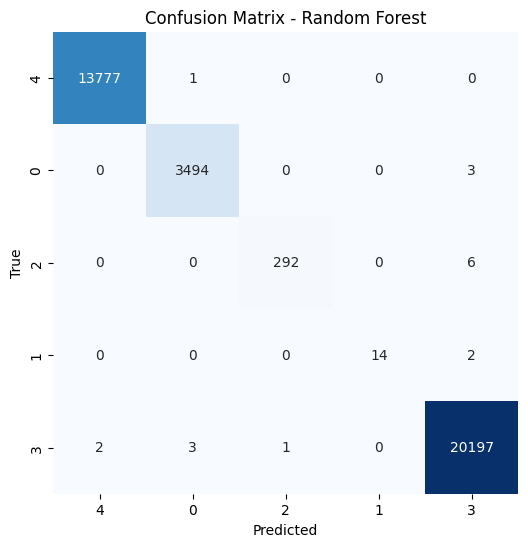


🔵 Model: XGBoost
Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00      3497
           2       0.99      0.98      0.98       298
           3       0.93      0.88      0.90        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.98      0.97      0.98     37792
weighted avg       1.00      1.00      1.00     37792

Confusion Matrix:
[[13778     0     0     0     0]
 [    0  3495     0     0     2]
 [    0     0   293     1     4]
 [    0     0     1    14     1]
 [    1     3     3     0 20196]]


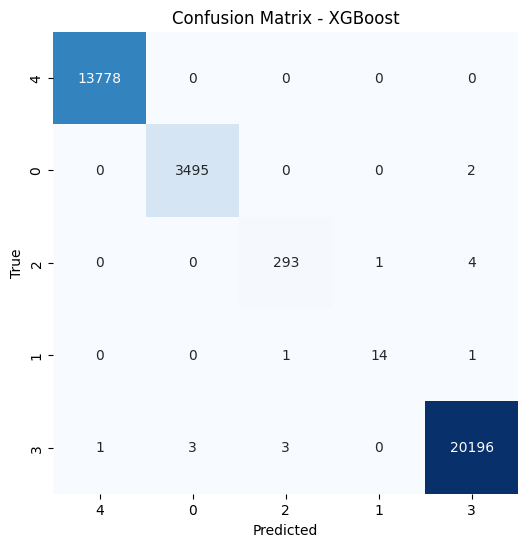


🔵 Model: Logistic Regression
Accuracy: 0.9838
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13778
           1       0.94      0.94      0.94      3497
           2       0.92      0.91      0.92       298
           3       1.00      0.75      0.86        16
           4       0.99      0.98      0.99     20203

    accuracy                           0.98     37792
   macro avg       0.97      0.92      0.94     37792
weighted avg       0.98      0.98      0.98     37792

Confusion Matrix:
[[13721    10     2     0    45]
 [   10  3302     1     0   184]
 [    0     8   271     0    19]
 [    0     0     4    12     0]
 [  115   198    15     0 19875]]


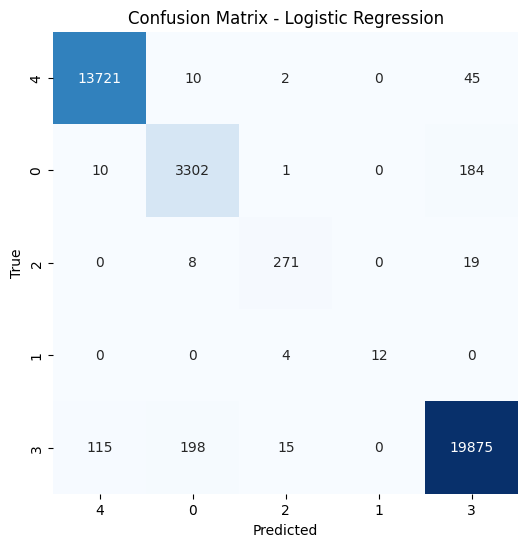


🔵 Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3153
[LightGBM] [Info] Number of data points in the train set: 88180, number of used features: 38
[LightGBM] [Info] Start training from score -1.008999
[LightGBM] [Info] Start training from score -2.380259
[LightGBM] [Info] Start training from score -4.840350
[LightGBM] [Info] Start training from score -7.803617
[LightGBM] [Info] Start training from score -0.626279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

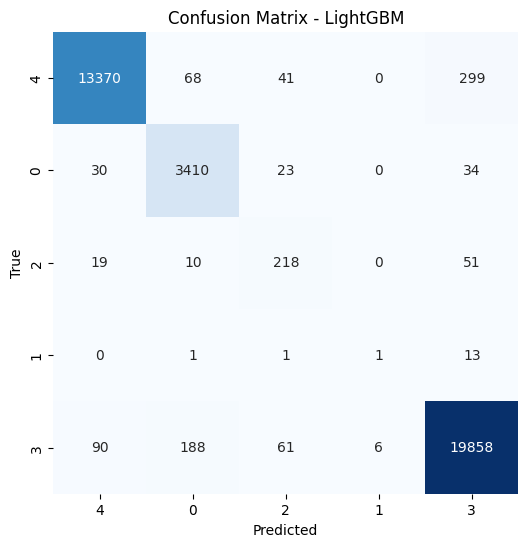

<Figure size 640x480 with 0 Axes>

In [20]:
# Install missing libraries if needed
# !pip install xgboost lightgbm scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 5. Train, Predict and Evaluate
for name, model in models.items():
    print(f"\n🔵 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", cbar=False, xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Show ROC plots
plt.tight_layout()
plt.show()